In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Data Handling
import os
import re
import string
import numpy as np
import pandas as pd
from numpy import array
from numpy import asarray
from numpy import zeros

# NLP Preprocessing
# import nltk
from tensorflow.keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Machine Learning & Model Evaluation
from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import (
    classification_report, f1_score, precision_score, recall_score,
    confusion_matrix, accuracy_score
)
# from skmultilearn.adapt import MLkNN

# Deep Learning (Keras & TensorFlow)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, LSTM, GRU, SimpleRNN, Dense, Dropout, Activation, Concatenate
)
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.utils import to_categorical

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
d1= pd.read_csv('/content/drive/MyDrive/NLP_Project/XLM_BiGru_MultiHeadSelfAttention/English/task2/en_transfer.csv')


In [4]:
# Word Pre-Processing

def normalize_text(text):
  emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F"  # emoticons
                              u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                              u"\U0001F680-\U0001F6FF"  # transport & map symbols
                              u"\U0001F700-\U0001F77F"  # alchemical symbols
                              u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                              u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                              u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                              u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                              u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                              u"\U00002702-\U000027B0"  # Dingbats
                              u"\U000024C2-\U0001F251"
                              "]+", flags=re.UNICODE)
  text = text.lower()
  text = re.sub('\[.*?\]', ' ', text)
  text = re.sub('https?://\S+|www\.\S+', ' ', text)
  text = re.sub('<.*?>+', ' ', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  text = re.sub('\n', ' ', text)
  text = re.sub('\w*\d\w*', ' ', text)
  text = re.sub('<handle replaced>', '', text)
  text = emoji_pattern.sub(r'', text)
  return text




In [5]:
d1['tweet'] = d1['tweet'].apply(lambda x: normalize_text(x))
d1

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolovely as a woman you shouldn t...
1,1,3,0,3,0,1,rt boy dats cold tyga dwn bad for ...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt you ...
3,3,3,0,2,1,1,rt c g anderson viva based she lo...
4,4,6,0,6,0,1,rt shenikaroberts the shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you s a muthaf in lie lifeasking pe...
24779,25292,3,0,1,2,2,you ve gone and broke the wrong heart baby an...
24780,25294,3,0,3,0,1,young buck wanna eat dat nigguh like i ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [6]:
# Re-map the labels: 0 and 1 → 1, 2 → 0
d1['class'] = d1['class'].apply(lambda x: 1 if x in [0, 1] else 0)

# Now keep only 7000 samples of the new label=1
label1_df = d1[d1['class'] == 1]

# Combine with all label=0 data
label0_df = d1[d1['class'] == 0]

# Concatenate the two subsets
d1_balanced = pd.concat([label1_df, label0_df]).reset_index(drop=True)


In [7]:
# Show value counts of the labels
print(d1_balanced['class'].value_counts())

# Keep only 'tweet' and 'label' columns, rename 'tweet' to 'text'
d1_balanced = d1_balanced[['tweet', 'class']].rename(columns={'tweet': 'text', 'class': 'label'})




class
1    20620
0     4163
Name: count, dtype: int64


In [8]:
# Display the head to verify
d1_balanced.head()
d1=d1_balanced

In [9]:
X1 = list(d1['text'])
y_data1 = d1["label"]

y1 = y_data1.values

print(y1)
print(len(y1))


[1 1 1 ... 0 0 0]
24783


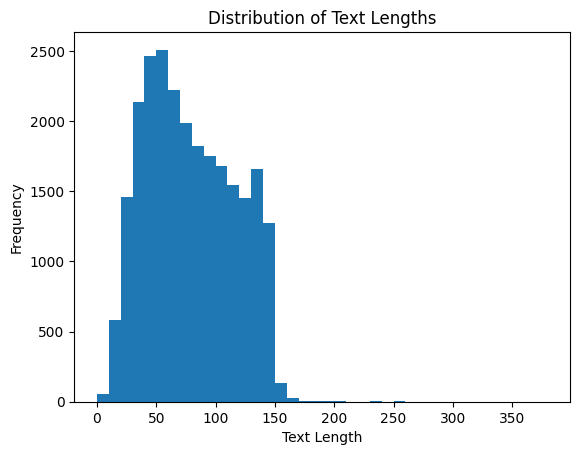

Average Text Length: 78.57378041399346
Length 0-10: 55 55
Length 10-20: 584 639
Length 20-30: 1458 2097
Length 30-40: 2137 4234
Length 40-50: 2462 6696
Length 50-60: 2509 9205
Length 60-70: 2220 11425
Length 70-80: 1988 13413
Length 80-90: 1824 15237
Length 90-100: 1750 16987
Length 100-110: 1677 18664
Length 110-120: 1547 20211
Length 120-130: 1454 21665
Length 130-140: 1660 23325
Length 140-150: 1272 24597
Length 150-160: 132 24729
Length 160-170: 27 24756
Length 170-180: 6 24762
Length 180-190: 3 24765
Length 190-200: 5 24770
Length 200-210: 3 24773
Length 210-220: 1 24774
Length 220-230: 0 24774
Length 230-240: 2 24776
Length 240-250: 0 24776
Length 250-260: 2 24778
Length 260-270: 1 24779
Length 270-280: 0 24779
Length 280-290: 0 24779
Length 290-300: 0 24779
Length 300-310: 1 24780
Length 310-320: 0 24780
Length 320-330: 1 24781
Length 330-340: 1 24782
Length 340-350: 0 24782
Length 350-360: 0 24782
Length 360-370: 0 24782
Length 370-380: 1 24783


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate the lengths of each text element
text_lengths = d1['text'].str.len()

# Create a histogram with bins of size 10
plt.hist(text_lengths, bins=range(0, text_lengths.max() + 10, 10))

plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.show()

# Calculate and print the average text length
average_length = text_lengths.mean()
print(f"Average Text Length: {average_length}")

# Get counts for each bucket of 10
bins = range(0, text_lengths.max() + 10, 10)
counts, _ = np.histogram(text_lengths, bins=bins)

sum=0
# Print the counts for each bucket
for i in range(len(bins) - 1):
    sum+=counts[i]
    print(f"Length {bins[i]}-{bins[i+1]}: {counts[i]} {sum}")

In [11]:
# -*- coding: utf-8 -*-
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Bidirectional, GRU, MultiHeadAttention
from tensorflow.keras.models import Model
from transformers import XLMRobertaTokenizer, TFXLMRobertaModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ======================
# CONFIGURATION
# ======================
MAX_LEN = 128  # Reduced for English text
BATCH_SIZE = 32
EPOCHS = 5
LEARNING_RATE = 2e-5
VAL_SPLIT = 0.2
CLASS_WEIGHT = {0: 1, 1: 4}  # Adjusted for English class distribution
XLM_MODEL_NAME = 'xlm-roberta-base'

# ======================
# MODEL ARCHITECTURE
# ======================
class XLMRobertaEmbedding(tf.keras.layers.Layer):
    def __init__(self, model_name, **kwargs):
        super().__init__(**kwargs)
        self.xlm_model = TFXLMRobertaModel.from_pretrained(model_name)

    def call(self, inputs):
        input_ids, attention_mask = inputs
        return self.xlm_model(
            input_ids,
            attention_mask=attention_mask,
            return_dict=True
        ).last_hidden_state

def create_model():
    input_ids = Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_ids')
    attention_mask = Input(shape=(MAX_LEN,), dtype=tf.int32, name='attention_mask')

    # XLM-R Embeddings
    embeddings = XLMRobertaEmbedding(XLM_MODEL_NAME)([input_ids, attention_mask])

    # BiGRU with reduced units for English
    gru_out = Bidirectional(GRU(512, return_sequences=True))(embeddings)

    # Multi-Head Attention
    attention = MultiHeadAttention(num_heads=4, key_dim=64)(gru_out, gru_out)

    # Pooling + Classification
    pooled = tf.keras.layers.GlobalAveragePooling1D()(attention)
    dropout = tf.keras.layers.Dropout(0.2)(pooled)
    output = Dense(1, activation='sigmoid')(dropout)

    return Model(inputs=[input_ids, attention_mask], outputs=output)


In [12]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [13]:
# ======================
# DATA PREPARATION
# ======================
# def load_english_data(file_path):
#     df = pd.read_csv(file_path)
#     df['text'] = df['text'].apply(lambda x: x.lower())  # Basic English preprocessing
#     return df

# Load dataset (replace with your English data path)
english_df = d1

# Split data
X_train, X_val, y_train, y_val = train_test_split(
    english_df['text'].values,
    english_df['label'].values,
    test_size=VAL_SPLIT,
    stratify=english_df['label'],
    random_state=42
)

# Tokenization
tokenizer = XLMRobertaTokenizer.from_pretrained(XLM_MODEL_NAME)

def preprocess(texts):
    return tokenizer(
        texts.tolist(),
        max_length=MAX_LEN,
        truncation=True,
        padding='max_length',
        return_tensors='tf'
    )

train_enc = preprocess(X_train)
val_enc = preprocess(X_val)

# ======================
# MODEL TRAINING
# ======================
model = create_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(LEARNING_RATE),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    {'input_ids': train_enc['input_ids'], 'attention_mask': train_enc['attention_mask']},
    y_train,
    validation_data=(
        {'input_ids': val_enc['input_ids'], 'attention_mask': val_enc['attention_mask']},
        y_val
    ),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    class_weight=CLASS_WEIGHT
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


OSError: Can't load tokenizer for 'xlm-roberta-base'. If you were trying to load it from 'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make sure 'xlm-roberta-base' is the correct path to a directory containing all relevant files for a XLMRobertaTokenizer tokenizer.

In [ ]:

# ======================
# EVALUATION & VISUALIZATION
# ======================
def evaluate_model(model, data, true_labels):
    y_pred = model.predict(data)
    y_pred_labels = (y_pred > 0.5).astype(int)

    print("\nClassification Report:")
    print(classification_report(true_labels, y_pred_labels))
    print(f"F1 Score: {f1_score(true_labels, y_pred_labels, average='weighted'):.4f}")

print("English Validation Results:")
evaluate_model(model,
    {'input_ids': val_enc['input_ids'], 'attention_mask': val_enc['attention_mask']},
    y_val
)


English Validation Results:
155/155 ━━━━━━━━━━━━━━━━━━━━ 48s 296ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.64      0.74       833
           1       0.93      0.98      0.96      4124

    accuracy                           0.93      4957
   macro avg       0.91      0.81      0.85      4957
weighted avg       0.92      0.93      0.92      4957

F1 Score: 0.9209


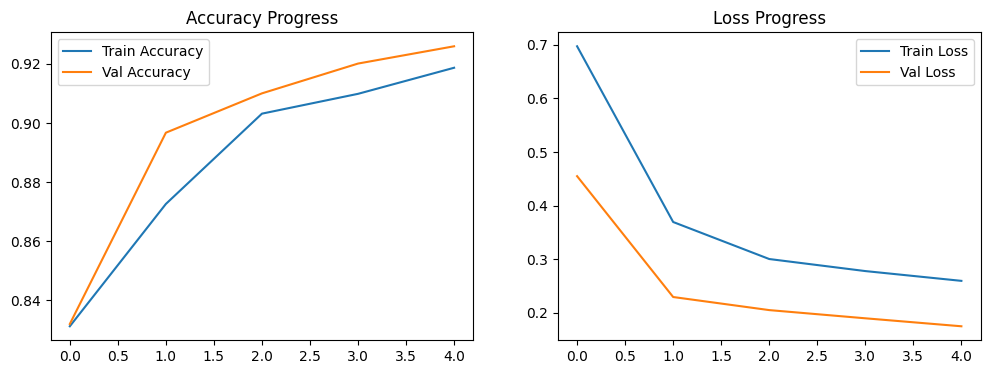

In [ ]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Progress')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Progress')
plt.legend()
plt.show()

In [ ]:
# Save model (TensorFlow SavedModel format)
model.save("/content/drive/MyDrive/NLP_Project/XLM_BiGru_MultiHeadSelfAttention/English/task2/Task2_Model.keras")

# Save tokenizer

from transformers import XLMRobertaTokenizer

# Save tokenizer in a dedicated directory
tokenizer.save_pretrained("/content/drive/MyDrive/NLP_Project/XLM_BiGru_MultiHeadSelfAttention/English/task2/Task2_tokenizer")

('/content/drive/MyDrive/NLP_Project/XLM_BiGru_MultiHeadSelfAttention/English/task2/Task2_tokenizer/tokenizer_config.json',
 '/content/drive/MyDrive/NLP_Project/XLM_BiGru_MultiHeadSelfAttention/English/task2/Task2_tokenizer/special_tokens_map.json',
 '/content/drive/MyDrive/NLP_Project/XLM_BiGru_MultiHeadSelfAttention/English/task2/Task2_tokenizer/sentencepiece.bpe.model',
 '/content/drive/MyDrive/NLP_Project/XLM_BiGru_MultiHeadSelfAttention/English/task2/Task2_tokenizer/added_tokens.json')

# Fine tuning

In [ ]:
# ======================
# LOAD SAVED MODEL
# ======================
print("Loading the saved model...")
loaded_model = tf.keras.models.load_model(
    "/content/drive/MyDrive/NLP_Project/XLM_BiGru_MultiHeadSelfAttention/English/task2/Task2_Model.keras",
    custom_objects={'XLMRobertaEmbedding': XLMRobertaEmbedding}
)

Loading the saved model...


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFXLMRobertaModel: ['lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing TFXLMRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFXLMRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


In [ ]:
# ======================
# FREEZE LAYERS FOR FINETUNING
# ======================
print("Freezing the base layers...")

# Print model summary to see layer names and structure
print("Model layers:")
for i, layer in enumerate(loaded_model.layers):
    print(f"{i}: {layer.name}")

Freezing the base layers...
Model layers:
0: input_ids
1: attention_mask
2: xlm_roberta_embedding_3
3: bidirectional_3
4: multi_head_attention_3
5: global_average_pooling1d_3
6: dropout_8
7: dense_3


In [ ]:
# Freeze XLM-RoBERTa embedding layer
for layer in loaded_model.layers:
    if isinstance(layer, XLMRobertaEmbedding):
        print(f"Freezing layer: {layer.name}")
        layer.trainable = False

Freezing layer: xlm_roberta_embedding_3


In [ ]:
'''
for layer in loaded_model.layers:
    if "gru" in layer.name.lower() or "bidirectional" in layer.name.lower():
        print(f"Freezing layer: {layer.name}")
        layer.trainable = False
'''

'\nfor layer in loaded_model.layers:\n    if "gru" in layer.name.lower() or "bidirectional" in layer.name.lower():\n        print(f"Freezing layer: {layer.name}")\n        layer.trainable = False\n'

In [ ]:
new_train_df = pd.read_csv('/content/drive/MyDrive/NLP_Project/NLP/training/train_en_l1.csv')

# Preprocess the new training data
print("Preprocessing training data...")
def normalize_text(text):
    emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F"  # emoticons
                              u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                              u"\U0001F680-\U0001F6FF"  # transport & map symbols
                              u"\U0001F700-\U0001F77F"  # alchemical symbols
                              u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                              u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                              u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                              u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                              u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                              u"\U00002702-\U000027B0"  # Dingbats
                              u"\U000024C2-\U0001F251"
                              "]+", flags=re.UNICODE)
    text = str(text).lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('<handle replaced>', '', text)
    text = emoji_pattern.sub(r'', text)
    return text

Preprocessing training data...


In [ ]:
new_train_df['text'] = new_train_df['text'].apply(lambda x: normalize_text(x))

# Extract labels from annotation columns
col_lst = ['en_a1', 'en_a2', 'en_a3', 'en_a4', 'en_a5', 'en_a6']
for col in col_lst:
    new_train_df[col] = pd.to_numeric(new_train_df[col], errors='coerce')

# Use maximum annotation value as the label
new_train_df['label'] = new_train_df[col_lst].max(axis=1, skipna=True).astype(int)
new_train_df = new_train_df[['text', 'label']]

# Check class distribution
print("Class distribution in new training data:")
print(new_train_df['label'].value_counts())

Class distribution in new training data:
label
0    5159
1    1372
Name: count, dtype: int64


In [ ]:
# Split new training data
X_finetune, X_val, y_finetune, y_val = train_test_split(
    new_train_df['text'].values,
    new_train_df['label'].values,
    test_size=0.2,
    stratify=new_train_df['label'],
    random_state=42
)

In [ ]:
tokenizer = XLMRobertaTokenizer.from_pretrained("/content/drive/MyDrive/NLP_Project/XLM_BiGru_MultiHeadSelfAttention/English/task2/Task2_tokenizer")

# Tokenize the new training data
def preprocess(texts):
    return tokenizer(
        texts.tolist(),
        max_length=MAX_LEN,
        truncation=True,
        padding='max_length',
        return_tensors='tf'
    )

finetune_enc = preprocess(X_finetune)
finetune_val_enc = preprocess(X_val)

In [ ]:

# Compile with a lower learning rate for finetuning
loaded_model.compile(
    optimizer=tf.keras.optimizers.Adam(5e-6),  # Even lower learning rate for partial finetuning
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Calculate class weights if imbalanced
unique, counts = np.unique(y_finetune, return_counts=True)
class_weights = {i: len(y_finetune) / (len(unique) * count) for i, count in zip(unique, counts)}
print("Class weights:", class_weights)

Class weights: {np.int64(0): np.float64(0.6329052580566997), np.int64(1): np.float64(2.381039197812215)}


In [ ]:
# Define early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

In [ ]:
# Finetune the model
finetune_history = loaded_model.fit(
    {'input_ids': finetune_enc['input_ids'], 'attention_mask': finetune_enc['attention_mask']},
    y_finetune,
    validation_data=(
        {'input_ids': finetune_val_enc['input_ids'], 'attention_mask': finetune_val_enc['attention_mask']},
        y_val
    ),
    epochs=5,  # Potentially more epochs but with early stopping
    batch_size=16,  # Smaller batch size for finetuning
    class_weight=class_weights,
    callbacks=[early_stopping]
)

Epoch 1/5
327/327 ━━━━━━━━━━━━━━━━━━━━ 89s 230ms/step - accuracy: 0.8126 - loss: 0.4320 - val_accuracy: 0.7712 - val_loss: 0.5179
Epoch 2/5
327/327 ━━━━━━━━━━━━━━━━━━━━ 72s 219ms/step - accuracy: 0.8027 - loss: 0.4486 - val_accuracy: 0.7819 - val_loss: 0.4985
Epoch 3/5
327/327 ━━━━━━━━━━━━━━━━━━━━ 90s 244ms/step - accuracy: 0.7942 - loss: 0.4467 - val_accuracy: 0.7506 - val_loss: 0.5477
Epoch 4/5
327/327 ━━━━━━━━━━━━━━━━━━━━ 82s 245ms/step - accuracy: 0.7979 - loss: 0.4502 - val_accuracy: 0.7781 - val_loss: 0.5020


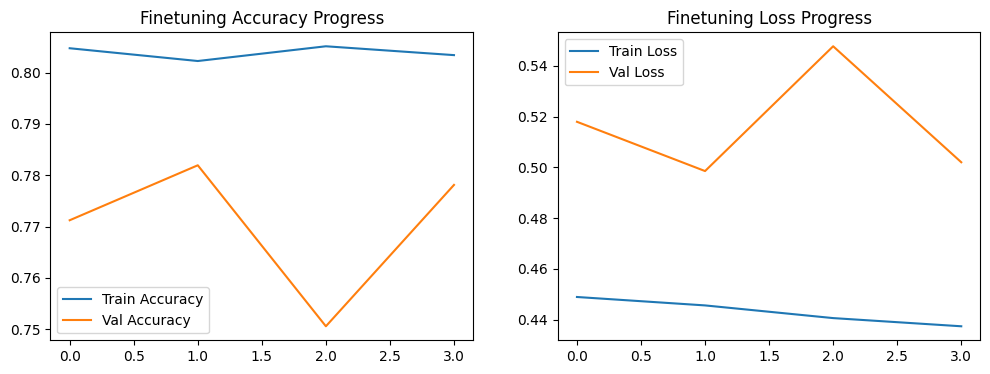

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(finetune_history.history['accuracy'], label='Train Accuracy')
plt.plot(finetune_history.history['val_accuracy'], label='Val Accuracy')
plt.title('Finetuning Accuracy Progress')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(finetune_history.history['loss'], label='Train Loss')
plt.plot(finetune_history.history['val_loss'], label='Val Loss')
plt.title('Finetuning Loss Progress')
plt.legend()
plt.show()

In [ ]:
# Evaluate on validation set
print("Evaluating finetuned model on validation set:")
val_predictions = loaded_model.predict({
    'input_ids': finetune_val_enc['input_ids'],
    'attention_mask': finetune_val_enc['attention_mask']
})
val_binary_preds = (val_predictions > 0.5).astype(int).flatten()
print(classification_report(y_val, val_binary_preds))

Evaluating finetuned model on validation set:
41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 344ms/step
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1032
           1       0.49      0.65      0.56       275

    accuracy                           0.78      1307
   macro avg       0.69      0.73      0.71      1307
weighted avg       0.81      0.78      0.79      1307



In [ ]:
# Save the finetuned model
loaded_model.save("/content/drive/MyDrive/NLP_Project/XLM_BiGru_MultiHeadSelfAttention/English/task2/Task2_Model_Finetuned.keras")
print("Finetuned model saved!")


Finetuned model saved!


# Transfer Learning: Testing


In [ ]:
import tensorflow as tf
from transformers import XLMRobertaTokenizer

# Load model with custom layer handling
loaded_model = tf.keras.models.load_model(
    "/content/drive/MyDrive/NLP_Project/XLM_BiGru_MultiHeadSelfAttention/English/task2/Task2_Model_Finetuned.keras",
    custom_objects={'XLMRobertaEmbedding': XLMRobertaEmbedding}
)

# Load tokenizer
tokenizer1 = XLMRobertaTokenizer.from_pretrained("/content/drive/MyDrive/NLP_Project/XLM_BiGru_MultiHeadSelfAttention/English/task2/Task2_tokenizer")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFXLMRobertaModel: ['lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing TFXLMRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFXLMRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


In [ ]:
vv_1= pd.read_csv('/content/drive/MyDrive/NLP_Project/NLP/testing/test_en_l1.csv')
vv1=vv_1


In [ ]:
vv_1['text'] = vv_1['text'].apply(lambda x: normalize_text(x))

# vv['text'] = vv['text'].apply(lambda x: normalize_text_2(x))
vv_1 = vv_1[['text']]

vv_1.columns = ['text']
vv_1

,text
0,who s this tweet about bitch it s about you ...
1,alkalamba should’ve used her slippers to slap...
2,coronavillains covididiot is a do...
3,acts like the female governors of stat...
4,let us celebrate “secular” as a beautiful w...
...,...
1102,you should be tired of not having any kind of ...
1103,“the limits of tyrants are prescribed by the e...
1104,like wtf my symbol is and i’m a crab and we...
1105,marry a millionaire guy divorce get half hi...


In [ ]:
# X = list(vv1['text'])
#y = np.asarray(d1[d1.columns[1:]])
col_lst = ['en_a1', 'en_a2', 'en_a3', 'en_a4', 'en_a5', 'en_a6']
for col in col_lst:
    vv1[col] = pd.to_numeric(vv1[col], errors='coerce')



vv1['label'] = vv1[col_lst].max(axis=1, skipna=True).astype(int)  # skipna=True to ignore empty values


vv1['label'] = vv1['label'].astype(int)


vv1 = vv1[['label', 'text']]


true_1 = vv1["label"]

# print(true_)
y_test_1 = true_1.values

print(y_test_1)
print(len(y_test_1))

[1 0 1 ... 1 1 1]
1107


In [ ]:
X_test=vv1['text'].values
y_test=vv1['label'].values

In [ ]:
# sequence1 = tokenizer1.texts_to_sequences(vv_1['text']) # same tokenizer which is used on train data.

def preprocess(texts):
    return tokenizer1(
        texts.tolist(),
        max_length=MAX_LEN,
        truncation=True,
        padding='max_length',
        return_tensors='tf'
    )

In [ ]:
test_enc = preprocess(X_test)


Test Set Evaluation:
35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 361ms/step

Best Threshold: 0.2983
              precision    recall  f1-score   support

     Neutral       0.77      0.75      0.76       633
       Abuse       0.68      0.70      0.69       474

    accuracy                           0.73      1107
   macro avg       0.72      0.73      0.72      1107
weighted avg       0.73      0.73      0.73      1107

Weighted F1: 0.7295


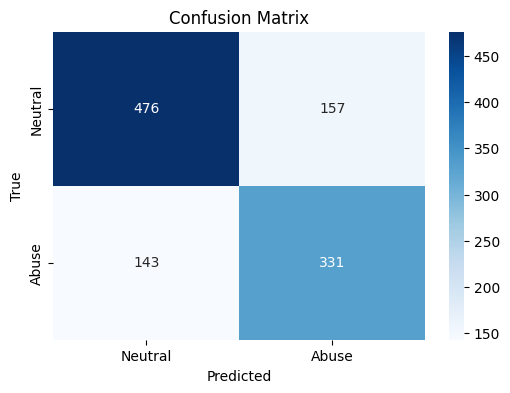

In [ ]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve

# ======================
# PREDICTION & EVALUATION
# ======================
def evaluate_model(model, data, true_labels):
    # Get predictions
    y_pred_probs = model.predict({
        'input_ids': data['input_ids'],
        'attention_mask': data['attention_mask']
    })

    # Find optimal threshold
    precision, recall, thresholds = precision_recall_curve(true_labels, y_pred_probs)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
    best_threshold = thresholds[np.argmax(f1_scores)]

    # Apply threshold
    y_pred = (y_pred_probs > best_threshold).astype(int)

    # Metrics
    print(f"\nBest Threshold: {best_threshold:.4f}")
    print(classification_report(true_labels, y_pred, target_names=['Neutral', 'Abuse']))
    print(f"Weighted F1: {f1_score(true_labels, y_pred, average='weighted'):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(true_labels, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Neutral', 'Abuse'],
                yticklabels=['Neutral', 'Abuse'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

print("Test Set Evaluation:")
evaluate_model(loaded_model, test_enc, y_test)



In [ ]:
from sklearn.metrics import classification_report, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve



# ======================
# SAMPLE PREDICTIONS
# ======================
def show_predictions(texts, labels, num_samples=5):
    indices = np.random.choice(len(texts), num_samples, replace=False)
    for idx in indices:
        text = texts[idx]
        true_label = labels[idx]

        inputs = tokenizer1(
            text,
            max_length=MAX_LEN,
            truncation=True,
            padding='max_length',
            return_tensors='tf'
        )
        pred_prob = loaded_model.predict([inputs['input_ids'], inputs['attention_mask']])[0][0]
        pred_label = "Abuse" if pred_prob > 0.5 else "Neutral"

        print(f"\nText: {text[:100]}...")
        print(f"True: {true_label} | Predicted: {pred_label} ({pred_prob:.4f})")

print("\nSample Predictions:")
show_predictions(X_test, y_test)


Sample Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Text:         hv u guys heard story of dogs barking behind running vehicle  moment vehicle stops  dog shut...
True: 0 | Predicted: Neutral (0.1070)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

Text: had to cut that hoe off cause the bitch was steady bitchin...
True: 1 | Predicted: Abuse (0.5718)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

Text: imagine trying to be nice to my sister who knows everything about you being a dumb bitch  we don’t l...
True: 0 | Predicted: Abuse (0.7935)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

Text:   y all don t wish for winters it sucks...
True: 0 | Predicted: Neutral (0.0585)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step

Text:  bossy archana  do you think you are the only one intelligent in this worlds  don’t under estimate a...
True: 1 | Predicted: Neutral (0.1213)
